<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/1.pytorch%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/1.%20pytorch%20%EA%B8%B0%EC%B4%88.ipynb 에서 몰래 가져왔다. 

필사를 필사적으로 해보자.


# 1. Pytorch 기초

기본적으로 pytorch(gpu) 및 기초 라이브러리가 깔려있고 기본적인 딥러닝 지식이 있다는 가정하에 진행한다는데 나는 그런게 없다.

## 1.1 Pytorch 패키지의 기본 구성

In [0]:
"""
1. pytorch
메인 네임스페이스입니다.
텐서 등의 다양한 수학 함수가 포함되어 있으며 Numpy와 유사한 구조(함수명들이 거의 똑같음)를 가집니다.

네임스페이스가 뭘까? 군대가기전에 C언어 배울 때 네임스페이스라고 들었던 거 같은데... 기억이 안난다.
"""
import torch

pytorch가 안 깔려 있으면 https://pytorch.org/get-started/locally/ 여기서 깔아보자.

In [0]:
"""
2. torch.autograd
자동 미분을 위한 함수들이 포함되어 있다.
자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나
자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함되어져 있다.

자동 미분은 알겠는데 콘텍스트 매니저는 잘 모르겠다. no_grad는 어디서 본거 같다.
"""
import torch.autograd

In [0]:
"""
3. torch.nn
신경망을 구축하기 위한 다양한 데이터 구조와 레이어가 정의되어져 있다.
예를 들어, CNN, RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수가 있다.

torch 안 사용하면 numpy로 구현해서 써야한다해서 바로 torch 설치 했다.
"""
import torch.nn

In [0]:
"""
4. torch.optim
확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한
파라미터 최적화 알고리즘이 구현되어 있다.

SGD 약자 구글에 검색해봤다. 비밀이다.
"""
import torch.optim

In [0]:
"""
5. torch.utils.data
SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어 있다.

이게 이런 의미인지 처음 알았다.
"""
import torch.utils.data

In [0]:
"""
6. torch.onnx
ONNX(Open Neural Network Exchange)의 포맷으로 모델을 export할 때 사용한다.
ONNX는 서로 다른 딥러닝 프레임워크 간 모델을 공유할 때 사용한다.(사용해본 적 없다.)

나도 사용해본 적 없는데 사용해야 할 것 같다.
"""
import torch.onnx

## 1.2 텐서 조작하기(Tensor Manipulation)

벡터, 행렬, 텐서의 개념에 대해서 이해하고, Numpy와 파이토치로 벡터, 행렬, 텐서를 다루는 방법을 이해하자.

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor1.PNG)

차원이 없는 값을 스칼라 (위 그림에 없음)

1차원으로 구성된 값을 벡터 (위 그림 중 1D)

2차원으로 구성된 값을 행렬 (위 그림 중 2D)

3차원으로 구성된 값을 텐서 (위 그림 중 3D)

4차원 이상부터는 머리로 생각하기 어렵다. 나는 왜 영화 인터스텔라 주인공 아저씨가 생각날까

4, 5, 6차원은 텐서를 쌓아 올린 것으로 보자.

근데 벡터나 행렬도 각각 1차원 텐서, 2차원 텐서로 표현하기도 한다.

이제 다 텐서라고 부르자

## 1.2.1 2D Tensor

딥러닝을 할 때 다루고 있는 데이터의 형태가 중요하다. 텐서의 크기를 고려해야 한다. 

다음은 봐도 봐도 잊어버리는 그림이다. 이번엔 꼭 기억하자

|t| = (Batch size, dim)

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor3.PNG)


2차원 텐서의 행의 크기를 batch size, 열의 크기를 dimension으로 표현했다.

훈련 데이터 하나의 크기를 256이라고 해보자. [3, 1, 2, 5, ...] 이런 숫자들의 나열이 256의 길이로 있다.

훈련 데이터 하나는 벡터의 차원이 256개 있는 것이다. 행렬 표현으로 1X256 이다.

만약 이런 훈련 데이터의 개수가 3000개라고 한다면, 전체 현재 데이터의 크기는 3000 * 256 이다.

컴퓨터는 훈련 데이터를 어떻게 처리할까? 컴퓨터는 보통 덩어리로 처리한다. 3000개에서 64개씩 꺼내서 처리한다고 하면

컴퓨터가 한 번에 처리하는 2차원 텐서의 크기는 (batch size * dim) = 64 * 256 이다.

In [7]:
"""
2D Tensor 예시
iris dataset
"""
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)

(150, 4)


iris dataset에는 150 X 4짜리 데이터가 있다.

10개만 가져와서 눈으로 봐보자

In [8]:
iris['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

iris dataset는 2차원 텐서이다.

텐서의 크기는 (batch size * dim) = 10 * 4 이다.

## 1.2.2 3D Tensor - 이미지

데이터의 형태가 이미지면 어떨까. 이미지는 가로와 세로가 있다. 그리고 여러 장이 있을 수도 있다.

데이터의 형태를 그림으로 나타내면 아래와 같다.

|t| = (batch size, width, height)

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor5.PNG)


위 그림의 세로는 이미지의 장 수 batch size, 가로는 너비 width, 안쪽으로는 높이 height가 된다.

이번에도 기억하긴 글렀다. 졸리다.

In [10]:
"""
3D Tensor 이미지 예시
digits(mnist와 비슷한 데이터) dataset
"""
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

mnist = load_digits()
print(mnist['images'].shape)

(1797, 8, 8)


disits dataset에는 1797 X 8 X 8 짜리 데이터가 있다.

0을 나타내는 이미지를 가져와서 눈으로 봐보자

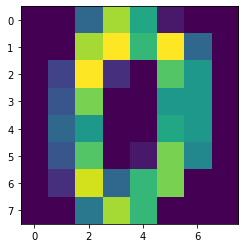

In [11]:
plt.imshow(mnist['images'][0])
plt.show()

digits dataset는 3차원 텐서이다.

텐서의 크기는 (batch size * width * height) = 1797 * 8 * 8 이다.

위의 그림은 8 * 8 짜리 이미지고 이 이미지가 1797개 있는 dataset 이다.

여기가 항상 헷갈렸다. 잊지말자

## 1.2.3 3D Tensor - 텍스트

데이터의 형태가 텍스트면 어떨까. 

그림으로 나타내면 아래와 같다.

|t| = (batch size, length, dim)

![image.png](https://wikidocs.net/images/page/52460/tensor6.PNG)

위 그림의 세로는 batch size, 가로는 문장이 길이 length, 안쪽으로는 단어 벡터의 차원 dim이 된다.

텍스트는 재미가 없다.

In [12]:
"""
3D Tensor 텍스트 예시
"""
sentences = ['나는 사과를 좋아해', '나는 바나나를 좋아해', '나는 사과를 싫어해', '나는 바나나를 싫어해']
word_sentences = [x.split(' ') for x in sentences]
print(word_sentences)

[['나는', '사과를', '좋아해'], ['나는', '바나나를', '좋아해'], ['나는', '사과를', '싫어해'], ['나는', '바나나를', '싫어해']]


컴퓨터는 '나는 사과를 좋아해'가 몇 단어인지 모른다. 그래서 단어별로 나눈거다.

In [13]:
my_bow = {'나는':[0.1, 0.2, 0.9],
          '사과를':[0.3, 0.5, 0.1],
          '좋아해':[0.3, 0.5, 0.2],
          '바나나를':[0.7, 0.6, 0.5],
          '싫어해':[0.5, 0.6, 0.7]}
word2vec = [[my_bow[word] for word in sentence] for sentence in word_sentences]
print(word2vec)
import numpy as np
np.array(word2vec).shape

[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.3, 0.5, 0.2]], [[0.1, 0.2, 0.9], [0.7, 0.6, 0.5], [0.3, 0.5, 0.2]], [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]], [[0.1, 0.2, 0.9], [0.7, 0.6, 0.5], [0.5, 0.6, 0.7]]]


(4, 3, 3)

텐서의 크기는 (batch size * length * dim) = 4 * 3 * 3 이다.

텍스트를 하니 이미지를 까먹었다.

## 1.2.4 넘파이로 텐서 만들기

In [0]:
import numpy as np

Numpy로 1차원 벡터를 만들어보자.

In [15]:
t=np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


1차원 벡터의 차원과 크기를 출력해보자.

In [16]:
print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank of t:  1
Shape of t:  (7,)


Numpy로 2차원 벡터를 만들어보자.

In [17]:
t=np.array([[1., 2., 3.],
            [4., 5., 6.,],
            [7., 8., 9.,],
            [10., 11., 12.,]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [18]:
print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank of t:  2
Shape of t:  (4, 3)


## 1.2.5 파이토치로 텐서 만들기

In [19]:
t = torch.tensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [20]:
print(t.dim())
print(t.shape)

1
torch.Size([7])


In [21]:
t = torch.tensor([[1., 2., 3.],
                 [4., 5., 6.],
                 [7., 8., 9.,],
                 [10., 11., 12.]
                 ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [22]:
print(t.dim())
print(t.shape)
print(t.size())

2
torch.Size([4, 3])
torch.Size([4, 3])


In [23]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 두번째 것만 가져온다.
print(t[:, 1].size())

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [24]:
print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 마지막 것만 제외하고 가져온다.

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


## 1.2.6 브로드캐스팅

브로드캐스팅(Broadcasting)

크기가 다른 텐서에 대해서 연산을 가능하게 해준다.

In [25]:
# 크기가 같은 텐서에 대한 연산
m1 = torch.tensor([[3., 3.]])
m2 = torch.tensor([[2., 2.]])
print(m1+m2)

tensor([[5., 5.]])


In [26]:
# 크기가 다른 텐서에 대한 연산
m1 = torch.tensor([[1., 2.]])
m2 = torch.tensor([3])
print(m1+m2)
# m2 가 [[3,3]] 이 되어 더해진다

tensor([[4., 5.]])


In [27]:
# 2 x 1 Vector + 1 X 2 Vector
m1 = torch.tensor([[1., 2.]])
m2 = torch.tensor([[3.],
                   [4.]])
print(m1 + m2)


# [1,2]
# ==> [[1, 2].
#      [1, 2]]
    
# [3]
# [4]
# ==> [[3, 3],
#      [4, 4]]


tensor([[4., 5.],
        [5., 6.]])


브로드캐스팅은 자동으로 실행되기 때문에 텐서를 다룰 때는 크기를 잘 파악해야한다!

## 1.2.7 곱셈, 평균, 덧셈

행렬 곱셈과 곱셈의 차이 (Matrix Mulitiplication Vs. Multiplitcation)

행렬 곱셈(.matmul)과 원소별 곱셈(.mul)를 잘 구분하자. 외적과 내적 느낌이다.

In [28]:
# 행렬 곱셈(.matmul)
m1 = torch.tensor([[1., 2.],
                  [3., 4.]])
m2 = torch.tensor([[1.],
                   [2.]])
print('Shape of Matrix 1: ', m1.size()) # 2 x 2
print('Shape of Matrix 2: ', m2.size()) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [29]:
# 원소별 곱셈(.mul)
# element-wise 곱셉을 하면 브로드캐스팅이 된 후에 수행된다.
m1 = torch.tensor([[1., 2.],
                  [3., 4.]])
m2 = torch.tensor([[1.],
                   [2.]])
print('Shape of Matrix 1: ', m1.size()) # 2 x 2
print('Shape of Matrix 2: ', m2.size()) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2)) # 2 x 2

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


평균을 구할 수도 있다.

In [30]:
t = torch.tensor([1., 2.])
print(t.mean())

tensor(1.5000)


In [31]:
t = torch.tensor([[1., 2.], 
                  [3., 4.]])
print(t.mean())

tensor(2.5000)


In [32]:
# 차원별로 보자
print(t.mean(dim=0)) # 첫번째 차원을 없앤 후 평균이다. 여기서는 행을 없애고 평균이다.
print(t.mean(dim=1)) # 두번째 차원을 없앤 후 평균이다. 여기서는 열을 없애고 평균이다.

tensor([2., 3.])
tensor([1.5000, 3.5000])


덧셈도 있다.

In [33]:
print(t.sum())
print(t.sum(dim=0)) # 첫번째 차원을 없앤 후 덧셈이다. 여기서는 행을 없애고 덧셈이다.
print(t.sum(dim=1)) # 두번째 차원을 없앤 후 덧셈이다. 여기서는 열을 없애고 덧셈이다.

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])


In [34]:
print(t.max()) # 원소 중 최대값을 리턴
print(t.argmax()) # 최대값의 인덱스를 리턴

tensor(4.)
tensor(3)


In [35]:
print(t.max(dim=0)) # 행을 없애고 max값을 받으면 값과 인덱스가 나온다.

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [36]:
print('Max:', t.max(dim=0)[0])
print('Argmax:', t.max(dim=0)[1])
# 이렇게 하면 둘 다 받을 수 있다.
# 근데 이게 의미가 있는가? 그건 잘 모르겠다.

Max: tensor([3., 4.])
Argmax: tensor([1, 1])


## 1.2.8 뷰, 스퀴즈, 언스퀴즈

뷰(View) - 원소의 수를 유지하면서 텐서의 크기를 변경한다. 매우 중요하다

numpy의 Reshape와 같은 역할을 하는 것이 pytorch의 View이다.

텐서의 크기(shape 또는 size())를 변경해준다.

In [37]:
t = np.array([[[0., 1., 2.],
              [3., 4., 5.]],
              [[6., 7., 8.],
              [9., 10., 11.]]])
tf = torch.FloatTensor(t)
print(tf.shape)

torch.Size([2, 2, 3])


![대체 텍스트](https://wikidocs.net/images/page/52846/tensor1.PNG)

In [38]:
print(tf.view([-1,3])) #ft라는 텐서를 (?, 3)의 크기로 변경
print(tf.view([-1,3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


![대체 텍스트](https://wikidocs.net/images/page/52846/tensor2.PNG)

In [39]:
print(tf.view([-1, 1, 3]))
print(tf.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


이쯤에서 까먹었을테니 가져왔다.

|t| = (batch size, width, height)

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor5.PNG)


스퀴즈(Squeeze) - 1인 차원을 제거한다.

In [40]:
ft = torch.FloatTensor([[0],
                        [1],
                        [2]])
print(ft)
print(ft.shape)
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])
tensor([0., 1., 2.])
torch.Size([3])


언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가한다.

In [41]:
ft = torch.FloatTensor([0, 1, 2])
print(ft)
print(ft.shape)
print(ft.unsqueeze(0)) # ft.view(1,-1)와 같다.
print(ft.unsqueeze(0).shape)
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([0., 1., 2.])
torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


다시 정리하면 view(), squeeze(), unsqueeze()는 텐서의 원소 수는 그대로 유지하면서 모양과 차원을 조절한다.

## 1.2.9 타입 캐스팅(Type Casting) 중요하다는데 안한다.

## 1.2.10 연결하기(Concatenate Vs. Stacking)

두 텐서를 연결할 수도 있다.

방법으로는 Concatenate와 Stacking 두가지가 있다.

In [42]:
x = torch.FloatTensor([[1, 2],
                      [3, 4]])
y = torch.FloatTensor([[5, 6],
                      [7, 8]])

print(torch.cat([x,y],dim=0))
print(torch.cat([x,y],dim=0).shape)
print(torch.cat([x,y],dim=1))
print(torch.cat([x,y],dim=1).shape)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])
torch.Size([2, 4])


딥러닝에서는 모델의 입력 또는 중간 연산에서 두 개의 텐서를 연결하는 경우가 많다.

두 텐서를 연결해서 입력으로 사용하는 것은 두 가지의 정보를 모두 사용한다는 의미를 가지고 있다.

In [43]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


![대체 텍스트](https://wikidocs.net/images/page/52846/tensor1_0xdY8pX.PNG)

In [44]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


![대체 텍스트](https://wikidocs.net/images/page/52846/tensor2_POePbuM.PNG)

## 1.2.11 ones_like와 zeros_like

In [45]:
x = torch.FloatTensor([[0, 1, 2],
                      [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [46]:
print(torch.ones_like(x)) # x와 같은 형태의 1로 채워진 텐서

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [47]:
print(torch.zeros_like(x)) # x와 같은 형태의 0으로 채워진 텐서

tensor([[0., 0., 0.],
        [0., 0., 0.]])


## 1.2.12 In-place Operation(덮어쓰기 연산)

In [48]:
x = torch.FloatTensor([[0, 1, 2],
                      [2, 1, 0]])
print(x.mul(3.))
print(x)

tensor([[0., 3., 6.],
        [6., 3., 0.]])
tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [49]:
print(x.mul_(3.)) # 연산 뒤에 _를 붙이면 기존의 값을 덮어쓰기 할 수 있다!
print(x)

tensor([[0., 3., 6.],
        [6., 3., 0.]])
tensor([[0., 3., 6.],
        [6., 3., 0.]])
